## Exercise 1: Linear Regression
*In this exercise, I import and plot data. I implement the gradient descent algorithm on data. *

In [1]:
from numpy import *
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


*Import data from a text file. The data has only two variables. Call independent variable x and dependent variable y.*

In [3]:
data = genfromtxt('ex1data1.txt',delimiter=',')

In [4]:
shape(data)

(97, 2)

In [5]:
x = data[:,0]
y = data[:,1]

*Plot using matplotlib, just like Matlab*

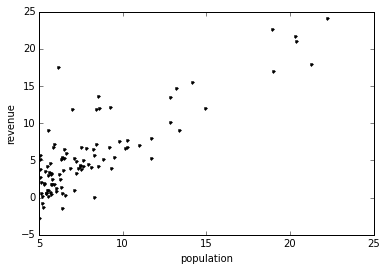

In [6]:
plot(x,y,'k.')
xlabel('population')
ylabel('revenue')

*Increase the dimension of x to include the constant term in the linear fit*

In [7]:
x0 = ones(shape(x))

In [8]:
X = vstack((x0,x)).T

In [9]:
shape(X)

(97, 2)

*theta0 is the initial parameter array for the linear regression, set to [0,0]*

In [10]:
theta0 = array([[0],[0]])
theta0

array([[0],
       [0]])

In [11]:
iterations = 1500
alpha = 0.01

*Create the cost function*

In [12]:
def compute_cost(X,y,theta):
    J = sum((y-dot(X,theta).T)**2)/2/len(y)
    return J

In [13]:
compute_cost(X,y,theta0)


32.072733877455676

*Function to run the gradient descent. Function returns the cost history (for each iteraction) as well as the final value of the fit parameters which minimize the cost, theta.*

In [14]:
def gradientDescent(X, y, theta0, alpha, num_iters):
    theta = copy(theta0)
    m = len(y)
    J_history = zeros(num_iters)
    """ iterate over the max number of iterations """
    for ii in range(0,num_iters):
        J_history[ii] = compute_cost(X,y,theta)
        dJ = dot(y-dot(X,theta).T,X).T/m
        theta = theta + alpha*dJ
    return (J_history,theta)

In [15]:
(J_history,theta) = gradientDescent(X,y,theta0,alpha,iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

*Check that the cost seems to be converging*

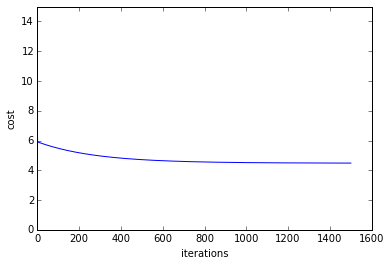

In [16]:
plot(J_history)
ylim([0,15])
xlabel('iterations')
ylabel('cost')

*Plot the linear fit*

C:\Python27\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Python27\lib\site-packages\matplotlib\legend.py:319: UserWarning: Unrecognized location "fit". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(six.iterkeys(self.codes))))


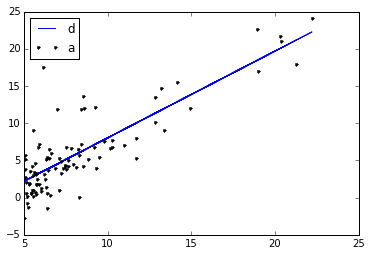

In [17]:
yfit = dot(X,theta)
plot(x,yfit)
plot(x,y,'k.')
legend('data','fit',loc='best')

*Use the fit to predict the profit (y) for a specific population (x)*

In [18]:
predict = dot(theta.T,array([1,35]))
predict

array([ 37.19239082])

In [19]:
s = 'For population 35,000, we predict a profit of %2.0f' % (predict[0]*10000)
print(s)

For population 35,000, we predict a profit of 371924


*Create a contour plot of the cost vs. the parameters theta. *
*Loop through a grid of values around the fit values of theta0 and theta1. This would have been faster if I had just vectorized compute cost.*

In [20]:
theta0_vals = linspace(-10,10,100)
theta1_vals = linspace(-1,4,100)

In [21]:
Jrange = zeros((100,100))
Xrange = zeros((100,100))
Yrange = zeros((100,100))

In [22]:
for idx, theta0 in enumerate(theta0_vals):
    for idy, theta1 in enumerate(theta1_vals):
        J = compute_cost(X,y,[[theta0],[theta1]])
        Jrange[idx,idy] = J
        Xrange[idx,idy] = theta0
        Yrange[idx,idy] = theta1
        

In [23]:
Yrange[0,0]

-1.0

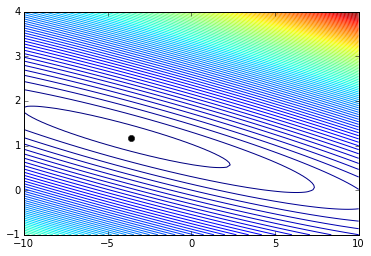

In [24]:
fig = figure()
""",projection='3d'"""
ax = fig.add_subplot(111) 
ax.contour(Xrange,Yrange,Jrange,100)
plot(theta[0],theta[1],'ko')